# Analyzing Streaming Service Content in SQL## By: Hrishikesh Dipak Desai

## Exploring our data
Let's start by checking out the data we will be working with. We can start with the `amazon`, `hulu`, `netflix`, and `disney` tables.

In [6]:
SELECT *
FROM amazon

id                      title  year  age    imdb rotten_tomatoes  type
0     3784      Underworld: Evolution  2006  18+    None          76/100     0
1     3788        Across the Universe  2007  13+    None          76/100     0
2     3821  Resident Evil: Apocalypse  2004  18+    None          74/100     0
3     3861                     Breach  2007  13+    None          72/100     0
4     3838              Robot & Frank  2012  13+    None          73/100     0
...    ...                        ...   ...  ...     ...             ...   ...
2952  2104                 Elfen Lied  2004  18+  8.0/10          77/100     1
2953  2117          Stargate Atlantis  2004   7+  8.1/10          76/100     1
2954  2301            Ghost Whisperer  2005   7+  6.4/10          68/100     1
2955  2289           The Amazing Race  2001   7+  7.6/10          68/100     1
2956  2288             Life in Pieces  2015  16+  8.0/10          69/100     1

[2957 rows x 7 columns]

In [11]:
SELECT *
FROM hulu

id                                          title  year   age    imdb  \
0     4083                           Assassination Nation  2018   18+    None   
1     4092                                      Soul Food  1997   18+    None   
2     4094                                    Hail Satan?  2019   18+    None   
3     4095  Tiny Toon Adventures: How I Spent My Vacation  1992  None    None   
4     4096                                    Little Fish  2021   16+    None   
...    ...                                            ...   ...   ...     ...   
1670  2545                  Whose Line Is It Anyway? (UK)  1988    7+  8.2/10   
1671  2544                         The Incredible Dr. Pol  2011    7+  8.6/10   
1672  2541           The Real Housewives of Beverly Hills  2010   16+  5.1/10   
1673  2540                                  Dharma & Greg  1997   16+  6.3/10   
1674  2579                        Mobile Suit Gundam Wing  2000   13+  8.1/10   

     rotten_tomatoes  type  
0             64/100     0  
1             63/100     0  
2             63/100     0  
3             63/100     0  
4             63/100     0  
...              ...   ...  
1670          60/100     1  
1671          60/100     1  
1672          60/100     1  
1673          60/100     1  
1674          59/100     1  

[1675 rows x 7 columns]

In [12]:
SELECT * 
FROM netflix

id                                       title  year   age    imdb  \
0     3605              Arango y Sanint: Ríase el show  2018  None    None   
1     3606                                       Match  2017  None    None   
2     3607                                 One Like It  2020  None    None   
3     3608                             What the Jatt!!  2015   all    None   
4     3609                        Deewana Main Deewana  2013  None    None   
...    ...                                         ...   ...   ...     ...   
4743  1945                           Million Yen Women  2017  None    None   
4744  1955  Paul Hollywood's Big Continental Road Trip  2017  None    None   
4745  2716                                     Paradox  2009   16+  7.0/10   
4746  2637                                Midnight Sun  2016  None  7.5/10   
4747     1                                Breaking Bad  2008   18+  9.4/10   

     rotten_tomatoes  type  
0             32/100     0  
1             32/100     0  
2             32/100     0  
3             32/100     0  
4             32/100     0  
...              ...   ...  
4743          14/100     1  
4744          13/100     1  
4745          56/100     1  
4746          58/100     1  
4747         100/100     1  

[4748 rows x 7 columns]

In [13]:
SELECT *
FROM disney

id                           title  year   age    imdb rotten_tomatoes  \
0    4132                         The Kid  2019   18+    None          62/100   
1    3959            Diary of a Wimpy Kid  2010    7+    None          67/100   
2    4204                     Teen Spirit  2019   13+    None          60/100   
3    4187     The Hunchback of Notre Dame  1923  None    None          60/100   
4    4864                       Pinocchio  2019   13+    None          72/100   
..    ...                             ...   ...   ...     ...             ...   
779  2396               Good Luck Charlie  2010   all  7.0/10          65/100   
780  2616  America's Funniest Home Videos  1989    7+  6.2/10          58/100   
781  2595   Running Wild with Bear Grylls  2014    7+  7.7/10          59/100   
782  2564                 Life Below Zero  2013    7+  8.0/10          60/100   
783  2544          The Incredible Dr. Pol  2011    7+  8.6/10          60/100   

     type  
0       0  
1       0  
2       0  
3       0  
4       0  
..    ...  
779     1  
780     1  
781     1  
782     1  
783     1  

[784 rows x 7 columns]

We can also inspect the `genres` table, which is different from the other tables.

In [14]:
SELECT *
FROM genres

title  \
0                          Sara's Notebook   
1           Rare Exports: A Christmas Tale   
2                          Gretel & Hansel   
3                                Mr. Jones   
4                      The Limehouse Golem   
...                                    ...   
9590                The Incredible Dr. Pol   
9591  The Real Housewives of Beverly Hills   
9592                         Dharma & Greg   
9593               Mobile Suit Gundam Wing   
9594                          Breaking Bad   

                                        genre  
0     Dramas, International Movies, Thrillers  
1                   Action, Adventure, Comedy  
2                      Drama, Horror, Mystery  
3                    Drama, History, Thriller  
4                    Crime, Mystery, Thriller  
...                                       ...  
9590                  Documentary, Reality-TV  
9591                                  Reality  
9592                           Comedy, Sitcom  
9593    Anime, International, Science Fiction  
9594  Crime TV Shows, TV Dramas, TV Thrillers  

[9595 rows x 2 columns]

## Preparing our data
### Joining the different tables
Our data appears to mostly have the same column names. So we can join the data with a series of [`UNION`](https://www.postgresql.org/docs/14/queries-union.html)s, which will append each table to the previous one.

We use `UNION ALL` to preserve any possible duplicate rows, as we will want to count entries if they appear in multiple services.

In [17]:
SELECT *
FROM amazon
UNION ALL
SELECT *
FROM hulu
UNION ALL
SELECT * 
FROM netflix
UNION ALL
SELECT *
FROM disney

id                           title  year  age    imdb  \
0      3784           Underworld: Evolution  2006  18+    None   
1      3788             Across the Universe  2007  13+    None   
2      3821       Resident Evil: Apocalypse  2004  18+    None   
3      3861                          Breach  2007  13+    None   
4      3838                   Robot & Frank  2012  13+    None   
...     ...                             ...   ...  ...     ...   
10159  2396               Good Luck Charlie  2010  all  7.0/10   
10160  2616  America's Funniest Home Videos  1989   7+  6.2/10   
10161  2595   Running Wild with Bear Grylls  2014   7+  7.7/10   
10162  2564                 Life Below Zero  2013   7+  8.0/10   
10163  2544          The Incredible Dr. Pol  2011   7+  8.6/10   

      rotten_tomatoes  type  
0              76/100     0  
1              76/100     0  
2              74/100     0  
3              72/100     0  
4              73/100     0  
...               ...   ...  
10159          65/100     1  
10160          58/100     1  
10161          59/100     1  
10162          60/100     1  
10163          60/100     1  

[10164 rows x 7 columns]

One problem with the above approach is that we lose out on the streaming service information. So let's repeat our query, but add in the required info!

In [16]:
SELECT *, 'amazon' AS service
FROM amazon
UNION
SELECT *, 'hulu' AS service
FROM hulu
UNION
SELECT *, 'netflix' AS service
FROM netflix
UNION
SELECT *, 'disney' AS service
FROM disney

id                         title  year   age    imdb rotten_tomatoes  \
0      4536          The Current Occupant  2020  None    None          49/100   
1       751               Sofia the First  2013   all  6.9/10          57/100   
2      1182         Donald Glover: Weirdo  2012  None    None          60/100   
3      4543              Shangri-La Suite  2016   16+    None          49/100   
4       874                  Intersection  2016  None  6.6/10          54/100   
...     ...                           ...   ...   ...     ...             ...   
10159  1833                    The Lovers  2017   18+    None          54/100   
10160  5613                      Slackers  2002   18+    None          58/100   
10161   287   A Futile and Stupid Gesture  2018   18+    None          75/100   
10162    97  Monty Python's Flying Circus  1969   16+  8.8/10          81/100   
10163  1101                      Ad Vitam  2018    7+  6.5/10          50/100   

       type  service  
0         0     hulu  
1         1  netflix  
2         0  netflix  
3         0     hulu  
4         1  netflix  
...     ...      ...  
10159     0  netflix  
10160     0   amazon  
10161     0  netflix  
10162     1  netflix  
10163     1  netflix  

[10164 rows x 8 columns]

Great! But we have one more table that might prove useful. Let's add in the genre information with a join.

To do this, we will need to use a [Common Table Expression](https://www.postgresql.org/docs/current/queries-with.html), or CTE.

In [1]:
WITH service_data AS (
	SELECT *, 'amazon' AS service
    FROM amazon
    UNION
    SELECT *, 'hulu' AS service
    FROM hulu
    UNION
    SELECT *, 'netflix' AS service
    FROM netflix
    UNION
    SELECT *, 'disney' AS service
    FROM disney
)

SELECT *
FROM service_data AS sd
LEFT JOIN genres AS g
	ON sd.title = g.film

id                         title  year   age    imdb rotten_tomatoes  \
0      4536          The Current Occupant  2020  None    None          49/100   
1       751               Sofia the First  2013   all  6.9/10          57/100   
2      1182         Donald Glover: Weirdo  2012  None    None          60/100   
3      4543              Shangri-La Suite  2016   16+    None          49/100   
4       874                  Intersection  2016  None  6.6/10          54/100   
...     ...                           ...   ...   ...     ...             ...   
10159  1833                    The Lovers  2017   18+    None          54/100   
10160  5613                      Slackers  2002   18+    None          58/100   
10161   287   A Futile and Stupid Gesture  2018   18+    None          75/100   
10162    97  Monty Python's Flying Circus  1969   16+  8.8/10          81/100   
10163  1101                      Ad Vitam  2018    7+  6.5/10          50/100   

       type  service                          film  \
0         0     hulu          The Current Occupant   
1         1  netflix               Sofia the First   
2         0  netflix         Donald Glover: Weirdo   
3         0     hulu              Shangri-La Suite   
4         1  netflix                  Intersection   
...     ...      ...                           ...   
10159     0  netflix                    The Lovers   
10160     0   amazon                      Slackers   
10161     0  netflix   A Futile and Stupid Gesture   
10162     1  netflix  Monty Python's Flying Circus   
10163     1  netflix                      Ad Vitam   

                                                   genre  
0                                                 Horror  
1                                               Kids' TV  
2                                        Stand-Up Comedy  
3                                   Comedy, Crime, Drama  
4                                        Drama, Suspense  
...                                                  ...  
10159               Comedies, Dramas, Independent Movies  
10160                                             Comedy  
10161                                           Comedies  
10162  British TV Shows, Classic & Cult TV, Internati...  
10163  Crime TV Shows, International TV Shows, TV Dramas  

[10164 rows x 10 columns]

### Inspecting missing data
It looks like we are missing some values in the `age` and `imdb` columns. We will also check the `rotten_tomatoes` column because we may use it later. Let's see how extensive this problem is.

To calculate the null values per column, we will use a combination of [SUM()](https://www.postgresql.org/docs/8.2/functions-aggregate.html) and [CASE WHEN](postgresql.org/docs/current/functions-conditional.html) to count the number of null values.

In [1]:
WITH service_data AS (
	SELECT *, 'amazon' AS service
    FROM amazon
    UNION
    SELECT *, 'hulu' AS service
    FROM hulu
    UNION
    SELECT *, 'netflix' AS service
    FROM netflix
    UNION
    SELECT *, 'disney' AS service
    FROM disney
),

all_data AS (
    SELECT *
    FROM service_data AS sd
    LEFT JOIN genres AS g
        ON sd.title = g.film
)

SELECT 
	SUM(CASE WHEN imdb IS NULL THEN 1 ELSE 0 END) AS imdb_missing,
    SUM(CASE WHEN age IS NULL THEN 1 ELSE 0 END) AS age_missing,
    SUM(CASE WHEN rotten_tomatoes IS NULL THEN 1 ELSE 0 END) AS rt_missing
FROM all_data

imdb_missing  age_missing  rt_missing
0          6901         3633           7

## Analyzing our data
### Which is the most family-friendly streaming service?
Let's start by looking at the most family-friendly streaming service by the percentage of content geared towards children.

We have our primary genre column, but that could leave out some content. A better way may be to use [pattern matching](https://www.postgresql.org/docs/current/functions-matching.html) to find any references to "kids", "family", etc.

In [10]:
WITH service_data AS (
	SELECT *, 'amazon' AS service
    FROM amazon
    UNION
    SELECT *, 'hulu' AS service
    FROM hulu
    UNION
    SELECT *, 'netflix' AS service
    FROM netflix
    UNION
    SELECT *, 'disney' AS service
    FROM disney
),

all_data AS (
    SELECT *
    FROM service_data AS sd
    LEFT JOIN genres AS g
        ON sd.title = g.film
)

SELECT
	*
FROM all_data
WHERE genre ILIKE '%kids%' 
    OR genre ILIKE '%family%' 
    OR genre ILIKE '%children%'

id                    title  year   age    imdb rotten_tomatoes  type  \
0      751          Sofia the First  2013   all  6.9/10          57/100     1   
1     2703      A Fairly Odd Summer  2014   all    None          45/100     0   
2     9266         Hawaiian Holiday  1937  None    None          49/100     0   
3     9196        All in a Nutshell  1949  None    None          52/100     0   
4     1559             Motown Magic  2018   all  7.7/10          41/100     1   
...    ...                      ...   ...   ...     ...             ...   ...   
1536  2171            For the Birds  2018  None    None          50/100     0   
1537  9096                Minutemen  2008   all    None          56/100     0   
1538  9381         Yellowstone Cubs  1963   all    None          45/100     0   
1539  8703                Frozen II  2019    7+    None          78/100     0   
1540  6982  The Uncomfortable Truth  2018   13+    None          46/100     0   

      service                     film  \
0     netflix          Sofia the First   
1        hulu      A Fairly Odd Summer   
2      disney         Hawaiian Holiday   
3      disney        All in a Nutshell   
4     netflix             Motown Magic   
...       ...                      ...   
1536   amazon            For the Birds   
1537   disney                Minutemen   
1538   disney         Yellowstone Cubs   
1539   disney                Frozen II   
1540   amazon  The Uncomfortable Truth   

                                                  genre  
0                                              Kids' TV  
1                    Children & Family Movies, Comedies  
2               Animation, Short, Comedy, Family, Sport  
3                      Family, Comedy, Animation, Short  
4                         Kids' TV, TV Sci-Fi & Fantasy  
...                                                 ...  
1536                   Animation, Short, Comedy, Family  
1537                  Adventure, Comedy, Family, Sci-Fi  
1538                                             Family  
1539  Animation, Adventure, Comedy, Family, Fantasy,...  
1540                Documentary, Kids, Special Interest  

[1541 rows x 10 columns]

Great! That seems to be working. Let's adapt our query and use `CASE WHEN` to perform an aggregation and see which platform has the highest percentage of family content.

In [8]:
WITH service_data AS (
	SELECT *, 'amazon' AS service
    FROM amazon
    UNION
    SELECT *, 'hulu' AS service
    FROM hulu
    UNION
    SELECT *, 'netflix' AS service
    FROM netflix
    UNION
    SELECT *, 'disney' AS service
    FROM disney
),

all_data AS (
    SELECT *
    FROM service_data AS sd
    LEFT JOIN genres AS g
        ON sd.title = g.film
)

SELECT
	service,
    AVG(CASE WHEN genre ILIKE '%kids%' 
        OR genre ILIKE '%family%' 
        OR genre ILIKE '%children%' THEN 1.0000 ELSE 0.0000 END) * 100 AS pct_family
FROM all_data
GROUP BY service
ORDER BY pct_family DESC

service  pct_family
0   disney   74.744898
1  netflix   11.057287
2     hulu   10.985075
3   amazon    8.319242

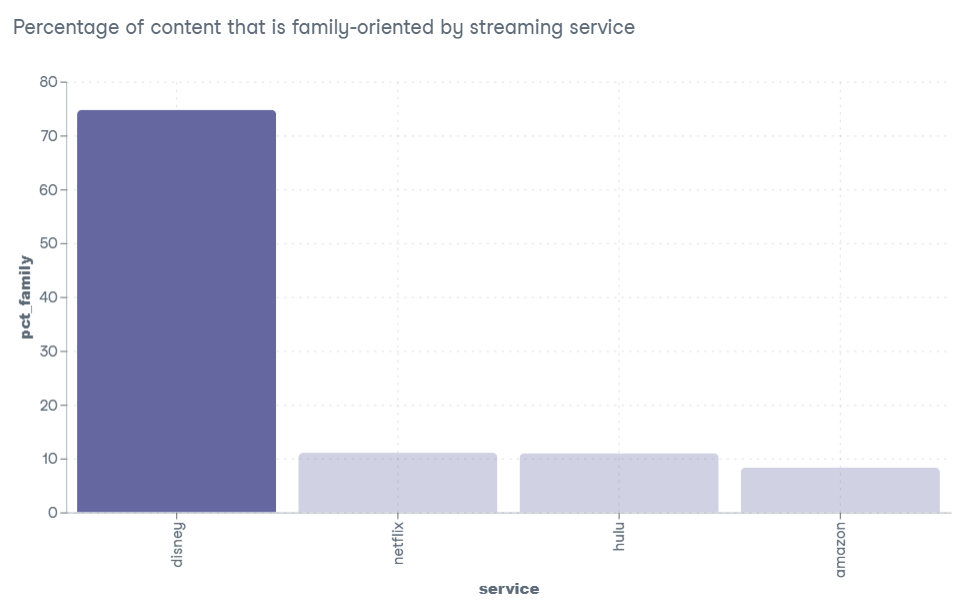

### Which has the highest-rated content?
We also have access to information on the ratings of each piece of content in the `rotten_tomatoes` column. We use [`SPLIT_PART()`](https://www.postgresql.org/docs/9.1/functions-string.html) to extract the number from the column and then cast (`::`) the result as a numeric.

We will also further split the data by movie and tv shows and visualize the result in a grouped bar chart.

In [15]:
WITH service_data AS (
	SELECT *, 'amazon' AS service
    FROM amazon
    UNION
    SELECT *, 'hulu' AS service
    FROM hulu
    UNION
    SELECT *, 'netflix' AS service
    FROM netflix
    UNION
    SELECT *, 'disney' AS service
    FROM disney
),

all_data AS (
    SELECT *
    FROM service_data AS sd
    LEFT JOIN genres AS g
        ON sd.title = g.film
)

SELECT
	service,
    CASE WHEN type = 1 THEN 'TV' ELSE 'Movie' END AS type,
    AVG(SPLIT_PART(rotten_tomatoes, '/', 1)::NUMERIC) AS rt_score
FROM all_data
GROUP BY service, type
ORDER BY rt_score DESC

service   type   rt_score
0     hulu  Movie  60.482517
1   disney  Movie  60.047934
2     hulu     TV  59.690625
3  netflix  Movie  54.965913
4   disney     TV  54.486034
5  netflix     TV  54.229586
6   amazon     TV  52.377207
7   amazon  Movie  51.990146

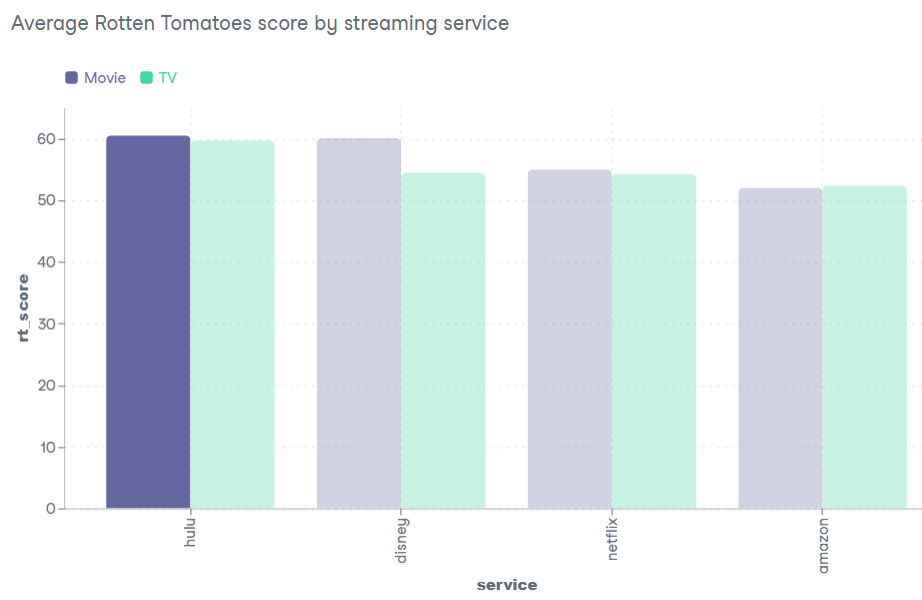

### Have critics and audiences diverged over time?
Okay, for our final analysis, lets put the service aside and look into whether critics and audiences were more aligned on tv shows in the past.

To prepare the date for the chart cell, we will need to use [`TO_DATE()`](https://www.postgresql.org/docs/current/functions-formatting.html) to convert the year into a date.

In [13]:
WITH service_data AS (
	SELECT *, 'amazon' AS service
    FROM amazon
    UNION
    SELECT *, 'hulu' AS service
    FROM hulu
    UNION
    SELECT *, 'netflix' AS service
    FROM netflix
    UNION
    SELECT *, 'disney' AS service
    FROM disney
),

all_data AS (
    SELECT *
    FROM service_data AS sd
    LEFT JOIN genres AS g
        ON sd.title = g.film
)

SELECT
	date,
    AVG(ABS(imdb_score - rt_score)) AS avg_difference
FROM (
    SELECT 
        TO_DATE(year::TEXT, 'YYYY') AS date,
        SPLIT_PART(rotten_tomatoes, '/', 1)::NUMERIC AS rt_score,
        SPLIT_PART(imdb, '/', 1)::NUMERIC * 10 AS imdb_score
    FROM all_data
    WHERE imdb IS NOT NULL
        AND rotten_tomatoes IS NOT NULL
    	AND year >= 2000
) AS sub
GROUP BY date
ORDER BY date

date  avg_difference
0  2000-01-01 00:00:00+00:00        9.714286
1  2001-01-01 00:00:00+00:00        9.588235
2  2002-01-01 00:00:00+00:00       10.210526
3  2003-01-01 00:00:00+00:00        5.517241
4  2004-01-01 00:00:00+00:00        9.258065
5  2005-01-01 00:00:00+00:00        7.867925
6  2006-01-01 00:00:00+00:00        8.574074
7  2007-01-01 00:00:00+00:00       13.025000
8  2008-01-01 00:00:00+00:00       10.500000
9  2009-01-01 00:00:00+00:00        8.746988
10 2010-01-01 00:00:00+00:00       14.493671
11 2011-01-01 00:00:00+00:00       11.372340
12 2012-01-01 00:00:00+00:00       16.230088
13 2013-01-01 00:00:00+00:00       11.690476
14 2014-01-01 00:00:00+00:00       13.823129
15 2015-01-01 00:00:00+00:00       15.009662
16 2016-01-01 00:00:00+00:00       16.349624
17 2017-01-01 00:00:00+00:00       16.388112
18 2018-01-01 00:00:00+00:00       16.416667
19 2019-01-01 00:00:00+00:00       16.933333
20 2020-01-01 00:00:00+00:00       14.862534
21 2021-01-01 00:00:00+00:00       10.895954

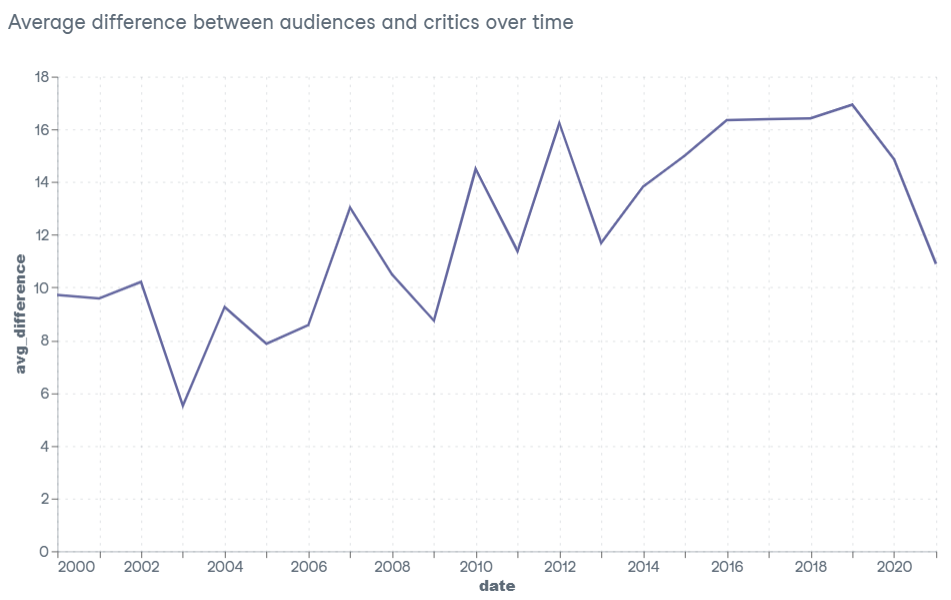